In [8]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from IPython.display import display_html
import random


In [2]:
path1=('https://raw.githubusercontent.com/Maga21/DSteel/d36394528eefac840f910cb1c4851a06c649469f/H1.csv')
#path2=('https://raw.githubusercontent.com/Maga21/DSteel/d36394528eefac840f910cb1c4851a06c649469f/H2.csv')
dataset1 = pd.read_csv(path1)
list(dataset1)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [3]:
dataset1.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [4]:
print(dataset1.shape)

(40060, 32)


In [5]:
dataset1.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,40060.0,0.277634,0.447837,0.00,0.0,0.0,1.0,1.0
lead_time,40060.0,92.675686,97.285315,0.00,10.0,57.0,155.0,737.0
arrival_date_year,40060.0,2016.121443,0.722347,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,40060.0,27.140864,14.005441,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,40060.0,15.821243,8.883708,1.00,8.0,16.0,24.0,31.0
stays_in_weekend_nights,40060.0,1.189815,1.147812,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,40060.0,3.128732,2.461329,0.00,1.0,3.0,5.0,50.0
adults,40060.0,1.867149,0.697285,0.00,2.0,2.0,2.0,55.0
children,40060.0,0.128682,0.445195,0.00,0.0,0.0,0.0,10.0
babies,40060.0,0.013904,0.118998,0.00,0.0,0.0,0.0,2.0


In [7]:
#Valores Nulos
dataset1.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             464
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              8209
company                           36952


In [11]:
#Reemplazo los valores nulls en 
replacements = {'country': 'Unknown', 'agent': (random.randrange(100, 999)), 'company': (random.randrange(100, 999))}
dataset1.fillna(replacements, inplace = True)
dataset1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Ahora me centraré en la limpieza revisando los outliers.
Eliminaré filas que tienen:
-Suma total de huéspedes = 0
-Adultos totales = 0
-Adultos > 4 (la mayoría de los hoteles solo permite 4 adultos por habitación
-Huéspedes totales > 5 (máximo de 2 adultos y 3 niños o bebés, pero no permiten 5 adultos en la habitación)

In [45]:
#outliersh = dataset1[(dataset1.adults>4)|(dataset1.adults==0)|
#                   ((dataset1.adults)+(dataset1.children)+(dataset1.babies)>5) ].index
#dataset1.drop(outliersh,axis=0,inplace=True)

In [14]:
#print(dataset1.shape)

In [18]:
dataset1['diastotales']=dataset1.stays_in_weekend_nights + dataset1.stays_in_week_nights
#dataset1.describe().T

In [12]:
#dataset1.diastotales.nlargest(20)

In [15]:
#outdias = dataset1[(dataset1.diastotales>30)].index
##dataset1.drop(outdias,axis=0,inplace=True)
#print(dataset1.shape)

#De una vez quito la fila con adr negativo
outadr=dataset1[(dataset1.adr<0)].index
dataset1.drop(outadr,axis=0,inplace=True)
print(dataset1.shape)

(40059, 32)


Para responder a las preguntas necesito las columnas: Country, adr, deposit_type, diastotales, arrival_date_month, market_segment, distribution_channel, is_canceled, reservation_status ... principalmente. De acuerdo al datatype, necesito hacer cambios en algunas de ellas...


In [71]:
#dataset1[['deposit_type','arrival_date_month','market_segment','distribution_channel','is_canceled','reservation_status']]=dataset1[['deposit_type','arrival_date_month','market_segment','distribution_channel','is_canceled','reservation_status']].astype('category')

In [19]:
dataset1.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,40059.0,0.277640,0.447841,0.0,0.0,0.0,1.0,1.0
lead_time,40059.0,92.673132,97.285186,0.0,10.0,57.0,155.0,737.0
arrival_date_year,40059.0,2016.121421,0.722342,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,40059.0,27.141292,14.005354,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,40059.0,15.821513,8.883654,1.0,8.0,16.0,24.0,31.0
stays_in_weekend_nights,40059.0,1.189745,1.147741,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,40059.0,3.128660,2.461318,0.0,1.0,3.0,5.0,50.0
adults,40059.0,1.867146,0.697294,0.0,2.0,2.0,2.0,55.0
children,40059.0,0.128685,0.445200,0.0,0.0,0.0,0.0,10.0
babies,40059.0,0.013904,0.118999,0.0,0.0,0.0,0.0,2.0


In [17]:
#dataset1.required_car_parking_spaces.nlargest(20)

In [79]:
#Nadie ocupa 8 cajones de estacionamiento en sus vacaciones ... se va
#outparking=dataset1[(dataset1.required_car_parking_spaces>3)].index
#dataset1.drop(outparking,axis=0,inplace=True)
#print(dataset1.shape)

#adr no puede ser 0
#outadr0=dataset1[(dataset1.adr==0.0)].index
#dataset1.drop(outadr0,axis=0,inplace=True)
#print(dataset1.shape)

(40010, 31)
(39288, 31)


In [80]:
#dataset1.to_csv (r'D:\DataScience\DSteel\H1Clean.csv', index = False, header=True)

In [120]:
#dataset1.info()

In [21]:
dataset2=dataset1.copy()

In [36]:
columns = [
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'adr',
]

for col in columns:
    q1 = dataset2[col].quantile(0.25)
    q3 = dataset2[col].quantile(0.75)

    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    print(f'Lower point: {round(lower, 2)} \t upper point: {round(upper, 2)} \t {col}')
    
    if lower == upper:
        continue
    
    cond1 = (dataset2[col] >= lower) & (dataset2[col] <= upper)
    cond2 = dataset2[col].isnull()
    dataset2 = dataset2[cond1 | cond2]

Lower point: -207.5 	 upper point: 372.5 	 lead_time
Lower point: -3.0 	 upper point: 5.0 	 stays_in_weekend_nights
Lower point: -5.0 	 upper point: 11.0 	 stays_in_week_nights
Lower point: 2.0 	 upper point: 2.0 	 adults
Lower point: 0.0 	 upper point: 0.0 	 children
Lower point: 0.0 	 upper point: 0.0 	 babies
Lower point: -63.92 	 upper point: 239.96 	 adr


Detección de outliers relacionando los días totales y lo que pagaron

In [37]:
dataset2.loc[:, 'diastotales']
dataset2.loc[:, 'precio'] = dataset2['adr'] * dataset2['diastotales']

In [38]:
impcol = ['diastotales', 'precio']
# convert to numpy array, because local outlier method want this
X = np.array(dataset2[impcol])

Elliptic Envelope

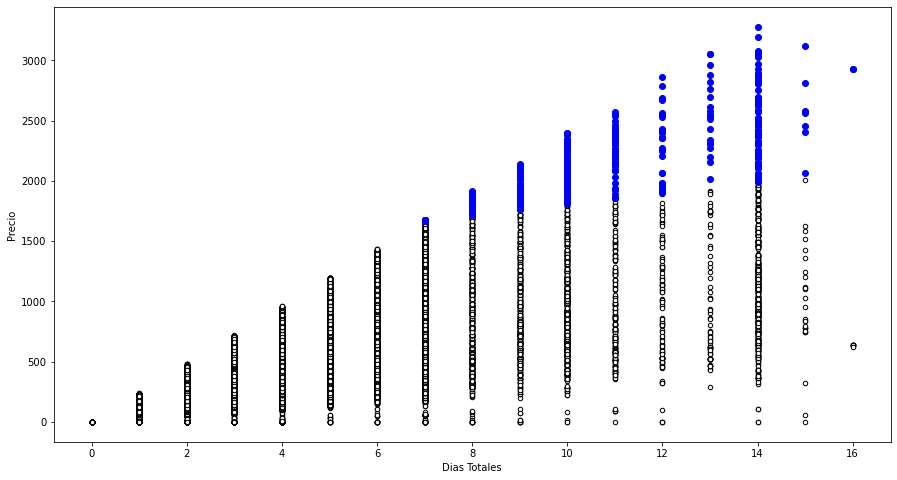

In [39]:
ee = EllipticEnvelope(contamination=.01, random_state=0)
y_pred_ee = ee.fit_predict(X)
#(-1: outlier, 1: normal)
anomalies = X[y_pred_ee == -1]

plt.figure(figsize=(15, 8))
plt.scatter(X[:, 0], X[:, 1], c='white', s=20, edgecolor='k')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='blue');
plt.xlabel('Dias Totales');
plt.ylabel('Precio');

Local Outlier factor

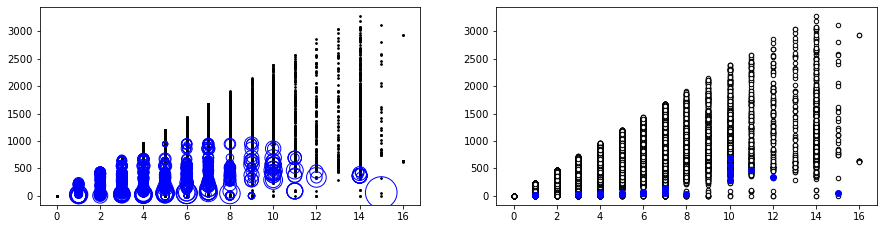

In [40]:
lof = LocalOutlierFactor(contamination=.001)
y_pred_lof = lof.fit_predict(X)
anomalies = X[y_pred_lof == -1]
# radius for red circles
X_score = lof.negative_outlier_factor_
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], color='k', s=3);
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='b', facecolors='none')

plt.subplot(2, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c='white', s=20, edgecolor='k')
plt.scatter(anomalies[:, 0], anomalies[:,1], c='blue');

In [41]:
newoutliers = dataset2[y_pred_lof == -1][impcol] \
    .groupby(impcol[0]) \
    .agg({impcol[1]: ['min', 'max', 'mean', 'std', 'median']})
newoutliers

precio                                         
                min     max        mean         std   median
diastotales                                                 
1             10.80   22.50   18.266667    6.485625   21.500
3             21.00   42.00   28.200000    8.378544   24.000
4             21.00   50.00   29.750000   13.573872   24.000
5             26.00   60.00   45.200000   14.669697   40.000
6             48.00   72.00   54.804000   10.546662   48.000
7             59.01  135.45  103.477500   38.302363  109.725
8             42.00   42.00   42.000000         NaN   42.000
10           290.00  693.00  460.575000  119.276938  420.000
11           462.00  462.00  462.000000         NaN  462.000
12           336.00  336.00  336.000000         NaN  336.000
15            60.00   60.00   60.000000         NaN   60.000

In [42]:
dataset2.dropna(axis='rows',inplace=True)
dataset2['price']=dataset2['precio'].astype('int')

In [43]:
df_cleaned = dataset2[y_pred_ee != -1] .copy()

h1_cleaned = df_cleaned

In [44]:
h1_cleaned.to_csv('D:\DataScience\DSteel\Cleaned\H1_cleaned.csv', index=False)

In [45]:
print(h1_cleaned.shape)

(37744, 35)
